# Necessary library

In [ ]:
# %pip install nepali-to-roman
# %pip install langdetect

# Input and Output paths

In [78]:
# load the to-be-tested dataset
to_be_tested_dataset_input_path="../Facebook Datas/dataset_facebook-comments-scraper_2024-05-03_16-07-42-569.csv"
filtered_dataset_output_path="../Profanity and Gender filtered Datas/dataset_facebook-comments-scraper_2024-05-03_16-07-42-569.csv"

# Keyword Gathering


### Manual Tagging Profanity Keywords

In [79]:
import pandas as pd
manual_tagging_df = pd.read_csv("./filterwordlist.csv")
manual_tagging_df

,RawRom,RawNep,NormNep,NormRom,Offensiveness,IsTaboo,Class,Class_Other,Profanity,Offensive
0,adhinayak,अधिनायक,अधिनायक,adhinayak,1.0,0.0,Politics,NaN,NaN,NaN
1,adhinayak tantra,अधिनायक तन्त्र,अधिनायक तन्त्र,adhinayak tantra,1.0,0.0,Politics,NaN,NaN,NaN
2,adhinayakatwa,अधिनायकत्व,अधिनायकत्व,adhinayakatwa,1.0,0.0,Politics,NaN,NaN,NaN
3,adhinayakbad,अधिनायकवाद,अधिनायकवाद,adhinayakbad,1.0,0.0,Politics,NaN,NaN,NaN
4,adhinayakbadi,अधिनायकवादी,अधिनायकवादी,adhinayakbadi,1.0,0.0,Politics,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,point to be noted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,hijada only is nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Checking the number of unique value in Profanity column
manual_tagging_df["Profanity"].value_counts()

Profanity
1            265
0            137
x              1
Profanity      1
Name: count, dtype: int64

In [81]:
# Filter the manual_tagging_df DataFrame to get only the rows where the Profanity is 1
manual_profanity_df = manual_tagging_df[manual_tagging_df["Profanity"] == 1]

# Reset the index of the manual_profanity_df DataFrame and drop the old index
manual_profanity_df = manual_profanity_df.reset_index(drop=True)

# The manual_profanity_df DataFrame now contains only the rows where the Profanity is 1, with a new index
manual_profanity_df

,RawRom,RawNep,NormNep,NormRom,Offensiveness,IsTaboo,Class,Class_Other,Profanity,Offensive


In [82]:
# Initialize an empty set for profanity words
profnaity_word_set = set()

# Update the profanity word set with the RawNep, RawRom, NormNep, and NormRom columns from the manual_profanity_df DataFrame
profnaity_word_set.update(
    set(manual_profanity_df["RawNep"]),
    set(manual_profanity_df["RawRom"]),
    set(manual_profanity_df["NormNep"]),
    set(manual_profanity_df["NormRom"])
)

# The profnaity_word_set set now contains unique profanity words from the RawNep, RawRom, NormNep, and NormRom columns of the manual_profanity_df DataFrame
profnaity_word_set

set()

### NepSA Profanity Keywords

In [83]:
# Read the NepSA.csv file into a pandas DataFrame
NepSA_df = pd.read_csv("./NepSA.csv", header=None)

# Rename the columns of the DataFrame
NepSA_df = NepSA_df.rename(columns={1: "Type", 2: "Keyword", 3: "Data"})

# Drop the first column of the DataFrame
NepSA_df = NepSA_df.drop(columns=[0])

# The NepSA_df DataFrame now contains the data from the csv file with the specified column names
NepSA_df

,Type,Keyword,Data
0,GENERAL,शोषक,यो मुजि बानियाँ ले कस्तो खाते कुरा गर्दैछ कुलम...
1,GENERAL,उल्लु बनाए,सबै भन्दा ठुलो सरकार ले नै सबै लाई उल्लु बनाए ...
2,GENERAL,न पहिला ठिक थियो न अहिले ठिक छ,यो पुलिस न पहिला ठिक थियो न अहिले ठिक छ यस्तो ...
3,GENERAL,चोर,यिनी चोर हरु ले जनता लाई अन्धकार मा रखेर आफ्नो...
4,GENERAL,हरास,सहि कुरा के पि को अस्तित्व हरास हुदैछ !
...,...,...,...
1695,FEEDBACK,कार्वाही हुनुपर्छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
1696,FEEDBACK,आवश्यक छ,गाडी एकदम राम्रो छ तर रोड भने आलु जस्तो छ दुइच...
1697,FEEDBACK,कम हुन्छ,कम से कम वायु प्रदूषण त कम हुन्छ ।
1698,FEEDBACK,लानु पर्छ,अब यसरी नै अन्य बस हरु थप्दै लानु पर्छ ।


In [84]:
# Checking the number of unique value in Type column
NepSA_df["Type"].value_counts()

Type
FEEDBACK     508
GENERAL      500
PROFANITY    407
VIOLENCE     285
Name: count, dtype: int64

In [85]:
# Filter the NepSA_df to get only the rows where the Type is "PROFANITY"
NepSA_profanity_df = NepSA_df[NepSA_df["Type"]=="PROFANITY"]

# Create a set of unique profanity keywords from the NepSA_profanity_df
NepSaprofane = set(NepSA_profanity_df["Keyword"])
NepSaprofane

{'gunda चोर अनि बलातकारि',
 'saale चोर',
 'अपराधी',
 'अपराधी डाँका',
 'अलछिना',
 'उत्तानो भएर थाप्ने',
 'कंलड़कित',
 'ककुरनि',
 'कन्डम फुटेर जन्मे को',
 'कलङ्क',
 'कुकुर',
 'कुकुर कुकुर्नी',
 'कुकुर को छाऊरो',
 'कुकुर को बच्चा हरु',
 'कुकुर डाका',
 'कुकुर बलतकारि',
 'कुकुरनि',
 'कुकुरनी',
 'कुत्ता',
 'खाते',
 'खाते चाेर',
 'खाते दलाल',
 'खाते मुजि',
 'खाते मुला',
 'खाते रन्डि को छोरा',
 'गद्दार',
 'गधा',
 'गु खा साल',
 'गोरु',
 'गोरु जस्तो मुजि डण्ठे',
 'घुसखोर ददाल भ्रस्ट लाई मुर्दाबाद',
 'चम्चा साला',
 'चाेर',
 'चाेरै चाेर',
 'चिकायो',
 'चिक्ने',
 'चिक्यो',
 'चिलाएर मोज गरिस',
 'चुतिया',
 'चुतिया भ्रष्टाचार को नाइके',
 'चुप साला',
 'चोर',
 'चोर , दलाल , भ्रष्ट , बलत्कारी',
 'चोर डाँ का',
 'चोर दलाल',
 'चोर भ्रस्ट',
 'चोर र फटाहा',
 'चोर साले',
 'चोरि',
 'चोरै चोर',
 'चौथो लिंगि',
 'छक्क',
 'छक्का',
 'छाडा रन्दि को छोरा',
 'जन्तु',
 'जाँठा',
 'जाँठा डाका',
 'जाठा',
 'जाठी',
 'जाठो',
 'जुठो खाने भतुवा कुकुर',
 'झुटे मुजि',
 'झोले कुकुर',
 'डम्ना',
 'डाका',
 'तेरि मा टोक्ने',
 'तेरि मा ड

In [86]:
# Update the profanity word set with the NepSaprofane set
profnaity_word_set.update(NepSaprofane)

# Convert the updated profanity word set to a list
profnaity_word_list = list(profnaity_word_set)
profnaity_word_set

{'gunda चोर अनि बलातकारि',
 'saale चोर',
 'अपराधी',
 'अपराधी डाँका',
 'अलछिना',
 'उत्तानो भएर थाप्ने',
 'कंलड़कित',
 'ककुरनि',
 'कन्डम फुटेर जन्मे को',
 'कलङ्क',
 'कुकुर',
 'कुकुर कुकुर्नी',
 'कुकुर को छाऊरो',
 'कुकुर को बच्चा हरु',
 'कुकुर डाका',
 'कुकुर बलतकारि',
 'कुकुरनि',
 'कुकुरनी',
 'कुत्ता',
 'खाते',
 'खाते चाेर',
 'खाते दलाल',
 'खाते मुजि',
 'खाते मुला',
 'खाते रन्डि को छोरा',
 'गद्दार',
 'गधा',
 'गु खा साल',
 'गोरु',
 'गोरु जस्तो मुजि डण्ठे',
 'घुसखोर ददाल भ्रस्ट लाई मुर्दाबाद',
 'चम्चा साला',
 'चाेर',
 'चाेरै चाेर',
 'चिकायो',
 'चिक्ने',
 'चिक्यो',
 'चिलाएर मोज गरिस',
 'चुतिया',
 'चुतिया भ्रष्टाचार को नाइके',
 'चुप साला',
 'चोर',
 'चोर , दलाल , भ्रष्ट , बलत्कारी',
 'चोर डाँ का',
 'चोर दलाल',
 'चोर भ्रस्ट',
 'चोर र फटाहा',
 'चोर साले',
 'चोरि',
 'चोरै चोर',
 'चौथो लिंगि',
 'छक्क',
 'छक्का',
 'छाडा रन्दि को छोरा',
 'जन्तु',
 'जाँठा',
 'जाँठा डाका',
 'जाठा',
 'जाठी',
 'जाठो',
 'जुठो खाने भतुवा कुकुर',
 'झुटे मुजि',
 'झोले कुकुर',
 'डम्ना',
 'डाका',
 'तेरि मा टोक्ने',
 'तेरि मा ड

In [87]:
# Calculating the total number of profanity words
len(profnaity_word_list)

221

# Profanity filtering

In [88]:

import pandas as pd

# Sentences filtering uidng above keywords
def profanityfilter(df, column_name, filterwords):
    # Create a regex pattern from the filterwords | acts as 'OR' for regex
    pattern = '|'.join(filterwords)

    # Filter the DataFrame using the regex pattern and specified column
    selected_df = df[df[column_name].str.contains(pattern, case=True)]

    # Create an empty list to store the results
    results = []

    # Iterate over the rows of the selected DataFrame
    for index, row in selected_df.iterrows():
        # Iterate over each filterword
        for filterword in filterwords:
            # Check if the filterword is present in the row's data
            if filterword.lower() in row[column_name].lower():
                # Append the row's data and the corresponding filterword to the results list
                results.append({column_name: row[column_name], 'Filterword': filterword})
                break  # Break out of the inner loop since we found a match

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    return selected_df, results_df


#### Importing to-be-tested Dataset

In [89]:
to_be_tested_dataset=pd.read_csv(to_be_tested_dataset_input_path)
to_be_tested_dataset.head()

,attachments/0/style_list/0,attachments/0/style_list/1,commentUrl,commentsCount,date,facebookId,facebookUrl,feedbackId,id,likesCount,postTitle,profileId,profileName,profilePicture,profileUrl,text,English Coversion,NameDetection
0,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,20.0,2022-10-24T03:10:02.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYzNTAyMjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjM1MDIyNjE0Nz...,279,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,100064466693095,Ramesh Lama/रमेश लामा,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Ramesh-Lama%E0...,राजनेतामा हुनुपर्ने गुण केपी शर्मा ओलीबाट अरूल...,Ramesh Lama/रमेश लामा,1
1,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,15.0,2022-10-24T04:08:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYwOTk2NjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjA5OTY2NjE0Mj...,140,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02SMFqo5CnBtboApXowERFoMongFAy82ttCSrgdiT...,Ramesh Bhattarai,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/ramesh.bhattarai.526,यो जनतासँगको सुन्दर साक्षात्कार जसलाई अध्यक्ष ...,Ramesh Bhattarai,1
2,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,12.0,2022-10-24T03:11:12.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzEyMDM5MTc5OT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMTIwMzkxNzk5Nj...,207,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02iDQt7vx39vvLE9pgEBJNmnuFxTzRAPZk6YMgE6b...,Madhab Kumar Khanal,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/madhabkumar.khanal,जनताको प्यारो नेता ।,Madhab Kumar Khanal,1
3,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T09:38:11.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzgyNDM5NjE4NT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODI0Mzk2MTg1NT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02spGu3LLrusveUHrEyHcpn8WgsRGGr5H6vvuFjhK...,Mahendra Gharti,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/mahendra.gharti.942,Good luck 👍,Mahendra Gharti,1
4,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T02:07:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3Xzg1MDM4OTkxNj...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODUwMzg5OTE2MT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0gtK1L51KA6gCq5irpM2hpxTho19ssZSYRvDGy7Mo...,Kasiram Xattre,https://scontent.fada1-13.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Kasiram-Xattre...,Good luck,Kasiram Xattre,1


#### Applying the filteration function

In [90]:
filtered_df,result_df= profanityfilter(to_be_tested_dataset,"text",profnaity_word_list)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   attachments/0/style_list/0  2 non-null      object 
 1   attachments/0/style_list/1  2 non-null      object 
 2   commentUrl                  25 non-null     object 
 3   commentsCount               18 non-null     float64
 4   date                        25 non-null     object 
 5   facebookId                  25 non-null     int64  
 6   facebookUrl                 25 non-null     object 
 7   feedbackId                  25 non-null     object 
 8   id                          25 non-null     object 
 9   likesCount                  25 non-null     int64  
 10  postTitle                   25 non-null     object 
 11  profileId                   25 non-null     object 
 12  profileName                 25 non-null     object 
 13  profilePicture              25 non-null   

# Gender Detection

#### Importing files

In [92]:
import pandas as pd

# Load boys' names and girls' names from Excel files
boys_names_df = pd.read_csv("./Boys Names Nepali + Indian - Names.csv")
girls_names_df = pd.read_csv("./Girl Name Nepali + Indian - Sheet1.csv")
voter_girls_names_df = pd.read_csv("voter_dataset_female.csv")
voter_boys_names_df = pd.read_csv("voter_dataset_male.csv")

#### Labeling, removing duplicate, null values for boys and girls

In [93]:
# Extract only the "Name" column and remove rows with missing values
boys_names_df = boys_names_df[["Name"]]
boys_names_df = boys_names_df.dropna()

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)

# Split names separated by ';' or '/' and explode into multiple rows
boys_names_df['Name'] = boys_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
boys_names_df = boys_names_df.explode('Name')

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)
boys_names_df.head()

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1


In [94]:
# For girls' names
girls_names_df = girls_names_df[["Name"]]
girls_names_df = girls_names_df.dropna()

# Split names separated by ';' or '/' and explode into multiple rows
girls_names_df['Name'] = girls_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
girls_names_df = girls_names_df.explode('Name')

# Assign a gender label (0 for girls)
girls_names_df = girls_names_df.assign(Gender=0)
girls_names_df.head()

,Name,Gender
0,Aanchal/Anchal,0
1,Aapti,0
2,Aarati/Arati,0
3,Aastha/Astha,0
4,Aayushi/Ayushi,0


In [95]:
voter_boys_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_boys_names_df = voter_boys_names_df[["Name","Gender"]]
voter_boys_names_df

,Name,Gender
0,Agam,1
1,Ajay,1
2,Anil,1
3,Anish,1
4,Anis,1
...,...,...
187083,Singu,1
187084,Harawanta,1
187085,Kadda,1
187086,Nardish,1


In [96]:
voter_girls_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_girls_names_df = voter_girls_names_df[["Name","Gender"]]
voter_girls_names_df

,Name,Gender
0,Anjana,0
1,Anju,0
2,Anita,0
3,Anu,0
4,Anupa,0
...,...,...
190862,Biladho,0
190863,Manahodar,0
190864,Maiyamoti,0
190865,Sikhama,0


#### Combining all the names in single dataframe

In [97]:
# Concatenate boys' and girls' names into one DataFrame
combined_names_df = pd.concat([boys_names_df, girls_names_df,voter_boys_names_df,voter_girls_names_df], ignore_index=True)

# Remove rows with missing values (NaN) in the "Name" column
combined_names_df = combined_names_df.dropna(subset=['Name'])

# Remove duplicate rows based on the "Name" column
combined_names_df = combined_names_df.drop_duplicates(subset=['Name'], keep='first')

# Reset index
combined_names_df = combined_names_df.reset_index(drop=True)

# Display the combined DataFrame
combined_names_df

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1
4,Aadhin,1
...,...,...
381574,Biladho,0
381575,Manahodar,0
381576,Maiyamoti,0
381577,Sikhama,0


#### Conversion of Nepali name into English

In [99]:
# %pip install nepali-to-roman
# %pip install langdetect
from langdetect import detect
import re
import ntr

def capitalize_after_space(name):
    words = name.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

def detect_nep_and_coversion(text):
      # Ensure that text is a string or convert it to a string if it's not
  if not isinstance(text, str):
      text = str(text)
  sentences = re.split(r'(?<=[.!?])\s+(?=\D)', text)
  english_comments = []
  for sentence in sentences:
      try:
          language = detect(sentence)
          if language == "ne":
            sentence=capitalize_after_space(ntr.nep_to_rom(sentence))
            english_comments.append(sentence)
          else:
            english_comments.append(sentence)
      except:
          pass
  filtered_comment = '.'.join(english_comments)
  return filtered_comment

In [100]:
filtered_df["English_Name"] = filtered_df["profileName"].apply(detect_nep_and_coversion)
filtered_df.head()

C:\Users\prash\AppData\Local\Temp\ipykernel_17328\473308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["English_Name"] = filtered_df["profileName"].apply(detect_nep_and_coversion)


,attachments/0/style_list/0,attachments/0/style_list/1,commentUrl,commentsCount,date,facebookId,facebookUrl,feedbackId,id,likesCount,postTitle,profileId,profileName,profilePicture,profileUrl,text,English Coversion,NameDetection,English_Name
0,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,20.0,2022-10-24T03:10:02.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYzNTAyMjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjM1MDIyNjE0Nz...,279,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,100064466693095,Ramesh Lama/रमेश लामा,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Ramesh-Lama%E0...,राजनेतामा हुनुपर्ने गुण केपी शर्मा ओलीबाट अरूल...,Ramesh Lama/रमेश लामा,1,Ramesh Lama/रमेश लामा
1,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,15.0,2022-10-24T04:08:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYwOTk2NjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjA5OTY2NjE0Mj...,140,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02SMFqo5CnBtboApXowERFoMongFAy82ttCSrgdiT...,Ramesh Bhattarai,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/ramesh.bhattarai.526,यो जनतासँगको सुन्दर साक्षात्कार जसलाई अध्यक्ष ...,Ramesh Bhattarai,1,Ramesh Bhattarai
2,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,12.0,2022-10-24T03:11:12.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzEyMDM5MTc5OT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMTIwMzkxNzk5Nj...,207,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02iDQt7vx39vvLE9pgEBJNmnuFxTzRAPZk6YMgE6b...,Madhab Kumar Khanal,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/madhabkumar.khanal,जनताको प्यारो नेता ।,Madhab Kumar Khanal,1,Madhab Kumar Khanal
10,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,3.0,2022-10-24T03:07:30.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3Xzc4ODk3MjgwMj...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNzg4OTcyODAyMT...,125,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0kjkkYjCCboKChhauuSmWhogwyRANLbt44UkFFKUz...,Mahesh Singh Mal Mal,https://scontent.fada1-13.fna.fbcdn.net/v/t39....,https://www.facebook.com/maheshsinghmal.mal,आहा कति भाग्यमानी भगवान माक्र्स कै फोन आएछ।,Mahesh Singh Mal Mal,1,Mahesh Singh Mal Mal
13,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,9.0,2022-10-24T07:16:17.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzUwMjUzNDIwND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNTAyNTM0MjA0OD...,16,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02N19j6VdC32VSGMS72V1d6rJ9kpkmvMSiKcbDKHk...,Peshal Pokharel,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,NaN,यस्ता देशलाई लथालिङ्ग र अस्थिरता तर्फ धकेल्ने ...,Peshal Pokharel,1,Peshal Pokharel


#### Detection of Gender using Name

In [98]:
# Function to get gender based on name input
def get_gender_from_name(name):
    if ' ' in name:
        name = name.split(maxsplit=1)[0].capitalize()
    else:
        name = name.capitalize()
    gender = combined_names_df[combined_names_df['Name'] == name]['Gender'].values
    if len(gender) > 0:
        return gender[0]
    else:
        return 'Unknown'

In [106]:
filtered_df["Gender"]=filtered_df["English_Name"].apply(get_gender_from_name)
filtered_df[["English Coversion","NameDetection"]].head()

C:\Users\prash\AppData\Local\Temp\ipykernel_17328\3679130156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Gender"]=filtered_df["English_Name"].apply(get_gender_from_name)


,English Coversion,NameDetection
0,Ramesh Lama/रमेश लामा,1
1,Ramesh Bhattarai,1
2,Madhab Kumar Khanal,1
10,Mahesh Singh Mal Mal,1
13,Peshal Pokharel,1


#### Analysis of Gender Data

In [107]:
filtered_df["NameDetection"].value_counts()

NameDetection
1          18
Unknown     6
0           1
Name: count, dtype: int64

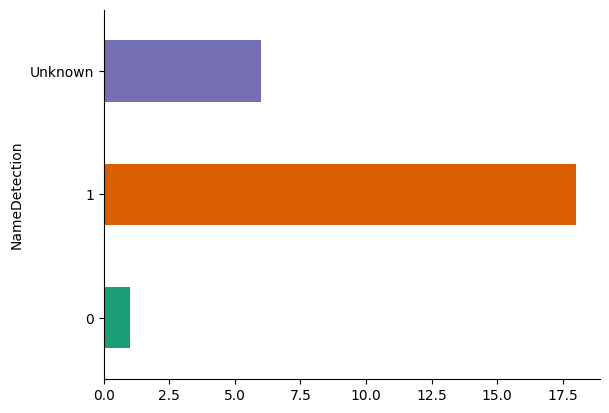

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
filtered_df.groupby('NameDetection').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [109]:
# Assuming "dataset_facebook_comments" is your DataFrame
unknown_names_df = filtered_df[filtered_df["NameDetection"] == "Unknown"]

# Selecting only the "profileName" and "NameDetection" columns
unknown_names_df = unknown_names_df[["profileName", "NameDetection"]]

print(unknown_names_df["NameDetection"].value_counts())
# Displaying the filtered DataFrame
unknown_names_df


NameDetection
Unknown    6
Name: count, dtype: int64


,profileName,NameDetection
16,Sk Tamang,Unknown
25,Er Topendra Rawal,Unknown
28,Prince Pokharel,Unknown
36,MrJee Van,Unknown
44,Rie Z ON ChheTri,Unknown
48,ŠuRěn Ãdkry,Unknown


# Saving the final Output

In [105]:
import os
os.makedirs(os.path.dirname(filtered_dataset_output_path), exist_ok=True)
filtered_df.to_csv(filtered_dataset_output_path)